In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.interpolate import interp1d

In [2]:
xdata = [10,14,18,22,26,30,34,38,42,46,50,54,58,62,66]
tdata = [66.04,60.04,54.81,50.42,46.74,43.66,40.76,38.49,36.42,34.77,33.18,32.36,31.56,30.91,30.56]
tdata_test = [96.14,80.12,67.66,57.96,50.90,44.84,39.75,36.16,33.31,31.15,29.28,27.88,27.18,26.40,25.86]
x = np.asarray((xdata))

def dp_c(x,p,g,k,h):
    return np.imag(Ts(x,p+1j*h,g))/h

def dg_c(x,p,g,k,h):
    return np.imag(Ts(x,p,g+1j*h))/h

def sensmat(xdata,p,g):
    k = 2.37
    h = 1e-13
    return np.column_stack((dp_c(xdata,p,g,k,h),dg_c(xdata,p,g,k,h)))


def Ts(x,p,h):
    k = 4.01
    L = 70
    a = b = 0.95
    Ta = 21.29
    y = np.sqrt(2*(a+b)*h/(a*b*k))
    c1 = -p/(k*y)*np.exp(y*L)*(h+k*y)/(np.exp(-y*L)*(h-k*y)+np.exp(y*L)*(h+k*y))
    c2 = p/(k*y) + c1
    return c1*np.exp(-y*x) + c2*np.exp(y*x) + Ta

popt, covt = curve_fit(Ts, xdata, tdata, [-18,0.001], maxfev=50000, gtol=0.000001)
print("Cu parameters = ", popt)
print(covt)

Cu parameters =  [-9.61103679e+00  1.32924879e-03]
[[ 4.12115269e-03 -5.35583298e-07]
 [-5.35583298e-07  7.52299682e-11]]


In [3]:
khi = np.asmatrix(sensmat(x,popt[0],popt[1]))
khi_t = np.transpose(khi)
multi = khi_t*khi
R = np.transpose(np.asmatrix(tdata)) - np.transpose(np.asmatrix(Ts(x,popt[0],popt[1])))

sigma2 = float(1/13*np.transpose(R)*R)

print("sigma2 = ", sigma2)

cov = np.asarray(sigma2*np.linalg.inv(multi))
print("cov = ", cov)
print("sigma = ", np.sqrt(sigma2))
print("sigma_psi = ", np.sqrt(cov[0][0]))
print("sigma_h = ",np.sqrt(cov[1][1]))

sigma2 =  0.027549672478830278
cov =  [[ 4.12115181e-03 -5.35583198e-07]
 [-5.35583198e-07  7.52299591e-11]]
sigma =  0.16598094010708062
sigma_psi =  0.06419619777326017
sigma_h =  8.673520568857465e-06


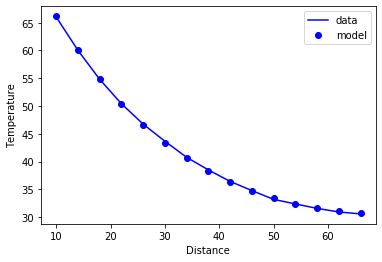

In [4]:
plt.figure()
plt.plot(xdata,tdata, '-', color='blue', label='data')
plt.plot(xdata, Ts(x,popt[0],popt[1]), 'o',color='blue', label='model')

plt.ylabel('Temperature')
plt.xlabel('Distance')
plt.legend()
plt.plot()
plt.show()

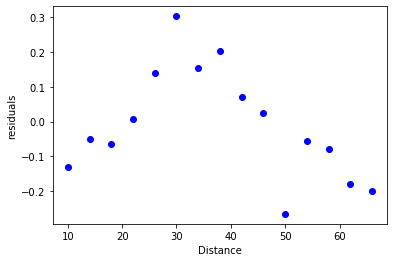

In [5]:
plt.figure()
plt.plot(xdata, tdata - Ts(x,popt[0],popt[1]), 'o',color='blue')

plt.ylabel('residuals')
plt.xlabel('Distance')
plt.plot()
plt.show()

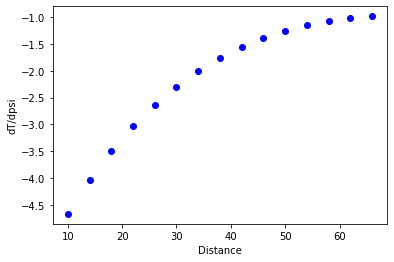

In [6]:
plt.figure()
plt.plot(xdata, dp_c(x,popt[0],popt[1],4.01,1e-10), 'o',color='blue')

plt.ylabel('dT/dpsi')
plt.xlabel('Distance')
plt.plot()
plt.show()

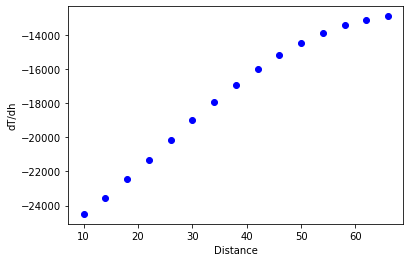

In [7]:
plt.figure()
plt.plot(xdata, dg_c(x,popt[0],popt[1],4.01,1e-10), 'o',color='blue')

plt.ylabel('dT/dh')
plt.xlabel('Distance')
plt.plot()
plt.show()